<a href="https://colab.research.google.com/github/Anderson1292/Artificial_intelligence/blob/main/notebooks/Auto_Encoder_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential,Model
from keras.layers import Dense,Input

In [ ]:
(X_test,_),(y_test,_) = cifar10.load_data()
X_test = X_test.astype('float32')/255
y_test = y_test.astype('float32')/255

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
X_test.shape

(50000, 3072)

In [ ]:
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
y_test = y_test.reshape((len(y_test),np.prod(y_test.shape[1:])))

In [ ]:
autoencoder = Sequential()

#encode
autoencoder.add(Dense(1536,activation='relu',input_dim=3072))
autoencoder.add(Dense(768,activation='relu'))

#decode
autoencoder.add(Dense(768,activation='relu'))
autoencoder.add(Dense(1536,activation='relu'))
autoencoder.add(Dense(3072,activation='sigmoid'))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1536)              4720128   
                                                                 
 dense_1 (Dense)             (None, 768)               1180416   
                                                                 
 dense_2 (Dense)             (None, 768)               590592    
                                                                 
 dense_3 (Dense)             (None, 1536)              1181184   
                                                                 
 dense_4 (Dense)             (None, 3072)              4721664   
                                                                 
Total params: 12,393,984
Trainable params: 12,393,984
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(X_test,X_test,epochs=10,batch_size=256,validation_data=(y_test,y_test))

Epoch 1/10
196/196 [==============================] - 79s 397ms/step - loss: 0.6322 - accuracy: 0.0021 - val_loss: 0.6075 - val_accuracy: 0.0029
Epoch 2/10
196/196 [==============================] - 78s 398ms/step - loss: 0.5989 - accuracy: 0.0040 - val_loss: 0.5967 - val_accuracy: 0.0043
Epoch 3/10
196/196 [==============================] - 76s 389ms/step - loss: 0.5905 - accuracy: 0.0053 - val_loss: 0.5879 - val_accuracy: 0.0067
Epoch 4/10
196/196 [==============================] - 76s 387ms/step - loss: 0.5859 - accuracy: 0.0064 - val_loss: 0.5883 - val_accuracy: 0.0078
Epoch 5/10
196/196 [==============================] - 77s 395ms/step - loss: 0.5829 - accuracy: 0.0079 - val_loss: 0.5858 - val_accuracy: 0.0084
Epoch 6/10
196/196 [==============================] - 76s 386ms/step - loss: 0.5811 - accuracy: 0.0074 - val_loss: 0.5810 - val_accuracy: 0.0079
Epoch 7/10
196/196 [==============================] - 77s 394ms/step - loss: 0.5795 - accuracy: 0.0084 - val_loss: 0.5803 - val_ac

In [ ]:
original_dimension = Input(shape=(3072,))
layer_encoded1 = autoencoder.layers[0]
layer_encoded2 = autoencoder.layers[1]
encoder = Model(original_dimension,layer_encoded2(layer_encoded1(original_dimension)))
coded_images = encoder.predict(y_test)
decoded_images = autoencoder.predict(y_test)

313/313 [==============================] - 8s 25ms/step


<ipython-input-8-62646e693143>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axis = plt.subplot(10,10,i+10+number_images)


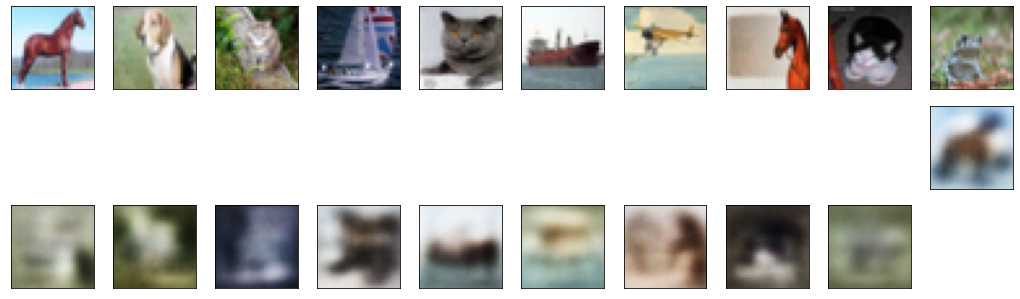

In [ ]:
number_images = 10
images_test = np.random.randint(y_test.shape[0],size=number_images)
plt.figure(figsize=(18,18))
for i,index in enumerate(images_test):

  #original images
  axis = plt.subplot(10,10,i+1)
  plt.imshow(y_test[index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())

  #coded images
  axis = plt.subplot(10,10,i+number_images*2)
  plt.imshow(coded_images[index].reshape(16,16,3))
  plt.xticks(())
  plt.yticks(())

  #decoded images
  axis = plt.subplot(10,10,i+10+number_images)
  plt.imshow(decoded_images[index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())